In [2]:
import numpy as np
from matplotlib import pyplot as plt
from iminuit import Minuit, cost
import pandas as pd

In [3]:


MR=0.775
GR=0.149
mpi=0.140

def lbd(x,y,z):
    return x**2+y**2+z**2-2*(x*y+x*z+y*z)

def BW(MR,GR,M):
    return 1./(MR**2-M**2-1j*MR*GR)

def GAM(M,GR=GR):
    def q(M,m):
        return np.sqrt(M**2/4-m**2)
    
    return GR*(q(M,mpi)/q(MR,mpi))**3*2./(1.+(q(M,mpi)/q(MR,mpi))**2)

def BWM(MR,GR,M,T=0,BETA=0):
    return np.exp(BETA*T)/(MR**2-M**2-1j*MR*GAM(M,GR))

def Lips(A,M):
    return A*np.sqrt(lbd(M**2,mpi**2,mpi**2))/M
    
def bkg(M,B,C,D,MR,GR,E=1,F=0,G=0,T=0,BETA=0):
    return (1.+Tpipi(M,MR,GR))*(B+C*M)/(1+D*M)*(E+F*T+G*T**2)*np.exp(BETA*T)

def intensity(M,A,B,C,D,MR,GR,PHI):
    return Lips(A,M)*abs(BWM(MR,GR,M)+np.exp(1j*PHI)*bkg(M,B,C,D,MR,GR))**2

def intensity_t(M,T,A,B,C,D,E,F,G,BETAR,BETAD,MR,GR,PHI):
    return Lips(A,M)*abs(BWM(MR,GR,M,T,BETAR)+np.exp(1j*PHI)*bkg(M,T,B,C,D,MR,GR,E,F,G,BETAD))**2

def intensity_45(M,A,B,C,D,E,F,G,BETAR,BETAD,MR,GR,PHI):
    return intensity_t(M,-0.45,A,B,C,D,E,F,G,BETAR,BETAD,MR,GR,PHI)

def intensity_55(M,A,B,C,D,E,F,G,BETAR,BETAD,MR,GR,PHI):
    return intensity_t(M,-0.55,A,B,C,D,E,F,G,BETAR,BETAD,MR,GR,PHI)

def intensity_65(M,A,B,C,D,E,F,G,BETAR,BETAD,MR,GR,PHI):
    return intensity_t(M,-0.65,A,B,C,D,E,F,G,BETAR,BETAD,MR,GR,PHI)

def intensity_75(M,A,B,C,D,E,F,G,BETAR,BETAD,MR,GR,PHI):
    return intensity_t(M,-0.75,A,B,C,D,E,F,G,BETAR,BETAD,MR,GR,PHI)

def intensity_85(M,A,B,C,D,E,F,G,BETAR,BETAD,MR,GR,PHI):
    return intensity_t(M,-0.85,A,B,C,D,E,F,G,BETAR,BETAD,MR,GR,PHI)

def intensity_95(M,A,B,C,D,E,F,G,BETAR,BETAD,MR,GR,PHI):
    return intensity_t(M,-0.95,A,B,C,D,E,F,G,BETAR,BETAD,MR,GR,PHI)

def BWPHASE(M,MR,GR):
    return np.arctan2(GAM(M,GR)*MR,(MR**2-M**2))

def Tpipi(M,MR,GR):
    return 0.5*(np.exp(2j*BWPHASE(M,MR,GR))-1.)

def Deck(M,A,B,C,D,MR,GR,PHI):
    return Lips(A,M)*abs(bkg(M,B,C,D,MR,GR))**2

def interference(M,A,B,C,D,MR,GR,PHI):
    return Lips(A,M)*2*np.real(np.conj(BWM(MR,GR,M))*np.exp(1j*PHI)*bkg(M,B,C,D,MR,GR))


df=pd.read_csv("moments/Y00-e3.2-3.4.dat",sep="\s+",comment="#",header=None,names=["-t","mpipi","Y00","dY00"])

df=df[df["mpipi"]<=1.2]
 
Y45=df[df["-t"]==0.45]
Y55=df[df["-t"]==0.55]
Y65=df[df["-t"]==0.65]
Y75=df[df["-t"]==0.75]
Y85=df[df["-t"]==0.85]
Y95=df[df["-t"]==0.95]

# <span style="color:red;"> Fit at t=-0.45 GeV<sup>2</sup></span>

In [4]:
c = cost.LeastSquares(Y45["mpipi"], Y45["Y00"], Y45["dY00"], intensity)
m1 = Minuit(c, A=0.,B=0.,C=0.,D=0.,MR=.8,GR=.2,PHI=0)
m1.migrad()
m1.minos()

E VariableMetricBuilder Initial matrix not pos.def.


C:\Users\szcis\AppData\Local\Temp\ipykernel_16820\3254793240.py:24: RuntimeWarning: invalid value encountered in divide
  return (1.+Tpipi(M,MR,GR))*(B+C*M)/(1+D*M)*(E+F*T+G*T**2)*np.exp(BETA*T)
C:\Users\szcis\AppData\Local\Temp\ipykernel_16820\3254793240.py:18: RuntimeWarning: invalid value encountered in divide
  return np.exp(BETA*T)/(MR**2-M**2-1j*MR*GAM(M,GR))


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.273 (χ²/ndof = 0.1)      │             Nfcn = 11859             │
│ EDM = 0.000131 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   0.648   │   0.033   │   -0.032   │   0.050    │         │         │       │
│ 1 │ B    │    2.1    │    0.9    │    -0.7    │    6.8     │         │         │       │
│ 2 │ C    │   -3.7    │    1.6    │   -12.7    │    1.3     │         │         │       │
│ 3 │ D    │    0.5    │    0.6    │    -0.5    │    3.9     │         │         │       │
│ 4 │ MR   │  0.7736   │  0.0032   │  -0.0033   │   0.0034   │         │         │       │
│ 5 │ GR   │   0.157   │   0.006   │   -0.006   │   0.007    │         │         │       │
│ 6 │ PHI  │    0.0    │    1.5    │    -1.5    │    1.5     │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           A           │           B           │           C           │           D           │          MR           │          GR           │          PHI          │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.032   │   0.050   │   -0.7    │    6.8    │   -12.7   │    1.3    │   -0.5    │    3.9    │  -0.0033  │  0.0034   │  -0.006   │   0.007   │   -1.5    │    1.5    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   False   │   False   │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌─────┬───────────────────────────────────────────────────────────────────────┐
│     │         A         B         C         D        MR        GR       PHI │
├─────┼───────────────────────────────────────────────────────────────────────┤
│   A │   0.00108   -0.0134    0.0210   -0.0046  0.043e-3  0.162e-3    0.0024 │
│   B │   -0.0134     0.794      -1.4       0.5 -1.876e-3 -1.135e-3       0.1 │
│   C │    0.0210      -1.4      2.61      -1.0  3.602e-3 

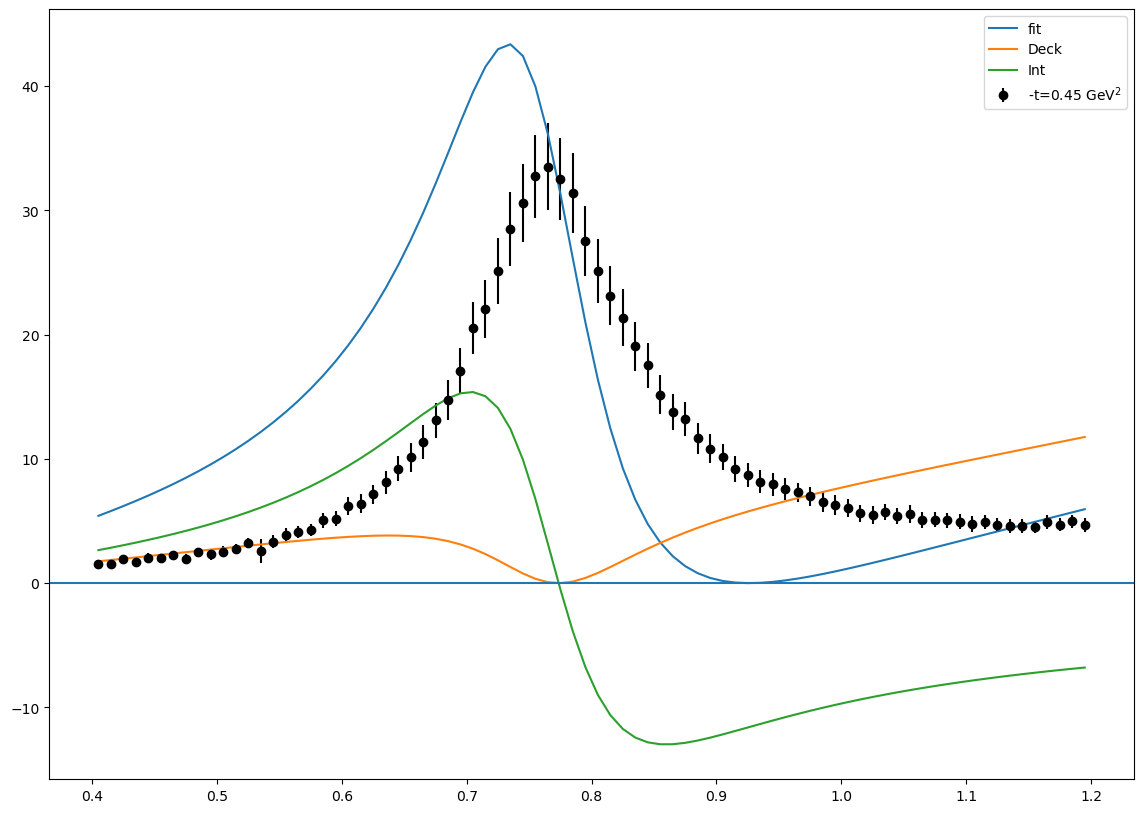

In [5]:
plt.rcParams["figure.figsize"] = (14,10)
plt.errorbar(Y45["mpipi"], Y45["Y00"], Y45["dY00"], fmt="ok", label=r"-t=0.45 GeV$^2$")
m1.values["C"]=-m1.values["C"]
plt.plot(Y45["mpipi"], intensity(Y45["mpipi"], *m1.values), label="fit")
plt.plot(Y45["mpipi"], Deck(Y45["mpipi"], *m1.values), label="Deck")
plt.plot(Y45["mpipi"], interference(Y45["mpipi"], *m1.values), label="Int")
plt.axhline()
plt.legend()

# <span style="color:red;"> Fit at t=-0.65 GeV<sup>2</sup></span>

In [6]:
c = cost.LeastSquares(Y65["mpipi"], Y65["Y00"], Y65["dY00"], intensity)
m1 = Minuit(c, A=0.,B=0.,C=0.,D=0.,MR=.8,GR=.2,PHI=0)
m1.migrad()
m1.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.3 (χ²/ndof = 0.5)       │             Nfcn = 3554              │
│ EDM = 8.3e-05 (Goal: 0.0002)     │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   0.311   │   0.021   │   -0.021   │   0.023    │         │         │       │
│ 1 │ B    │    2.2    │    0.5    │    -0.5    │    0.6     │         │         │       │
│ 2 │ C    │   -3.3    │    0.9    │    -1.1    │    0.8     │         │         │       │
│ 3 │ D    │   -0.01   │   0.24    │   -0.22    │    0.32    │         │         │       │
│ 4 │ MR   │   0.787   │   0.005   │   -0.005   │   0.005    │         │         │       │
│ 5 │ GR   │   0.191   │   0.008   │   -0.008   │   0.008    │         │         │       │
│ 6 │ PHI  │   -0.0    │    0.6    │    -0.6    │    0.6     │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           A           │           B           │           C           │           D           │          MR           │          GR           │          PHI          │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.021   │   0.023   │   -0.5    │    0.6    │   -1.1    │    0.8    │   -0.22   │   0.32    │  -0.005   │   0.005   │  -0.008   │   0.008   │   -0.6    │    0.6    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌─────┬───────────────────────────────────────────────────────────────────────┐
│     │         A         B         C         D        MR        GR       PHI │
├─────┼───────────────────────────────────────────────────────────────────────┤
│   A │  0.000461   -7.7e-3   11.5e-3   -1.8e-3  0.061e-3   0.15e-3   -0.1e-3 │
│   B │   -7.7e-3     0.272     -0.45      0.11 -1.792e-3  -2.03e-3     -0.00 │
│   C │   11.5e-3     -0.45     0.751     -0.20  3.174e-3 

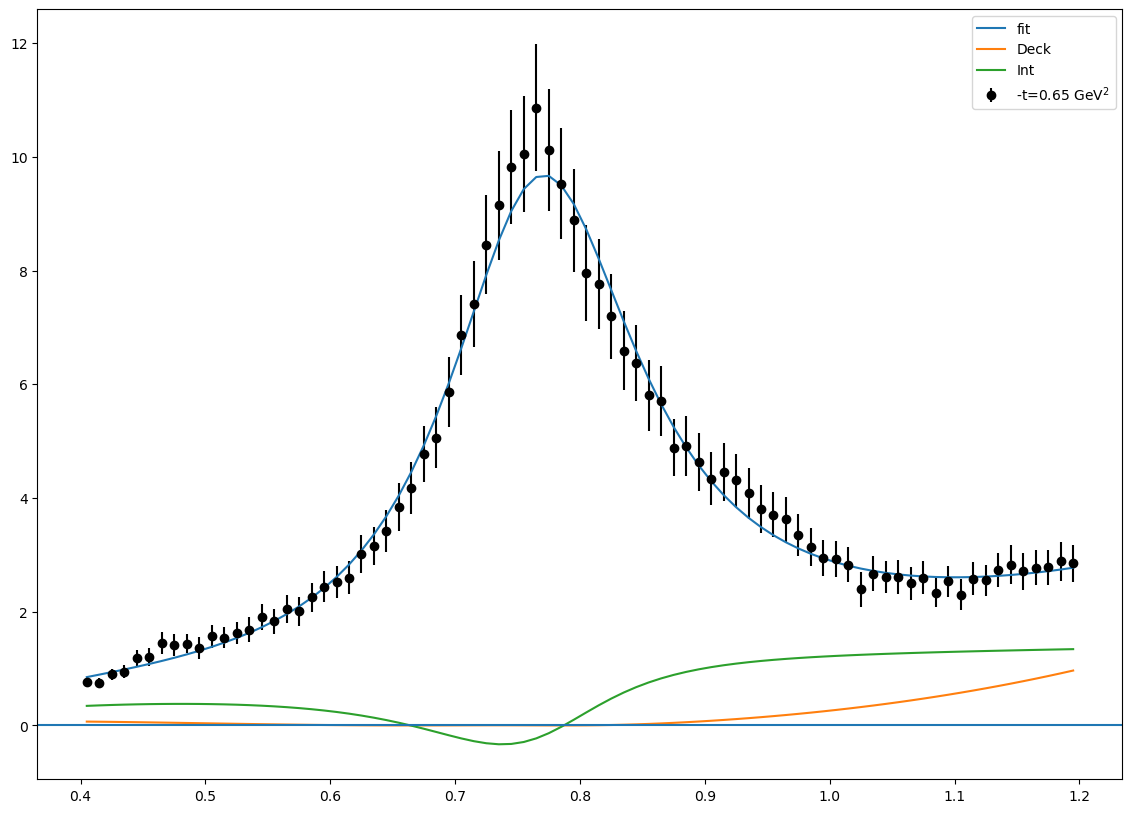

In [7]:
plt.rcParams["figure.figsize"] = (14,10)
plt.errorbar(Y65["mpipi"], Y65["Y00"], Y65["dY00"], fmt="ok", label=r"-t=0.65 GeV$^2$")
plt.plot(Y65["mpipi"], intensity(Y65["mpipi"], *m1.values), label="fit")
plt.plot(Y65["mpipi"], Deck(Y65["mpipi"], *m1.values), label="Deck")
plt.plot(Y65["mpipi"], interference(Y65["mpipi"], *m1.values), label="Int")
plt.axhline()
plt.legend();

# <span style="color:red;"> Fit at t=-0.85 GeV<sup>2</sup></span>

In [8]:
c = cost.LeastSquares(Y85["mpipi"], Y85["Y00"], Y85["dY00"], intensity)
m1 = Minuit(c, A=0.,B=0.,C=0.,D=0.,MR=.8,GR=.2,PHI=0)
m1.migrad()
m1.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 25.07 (χ²/ndof = 0.3)      │             Nfcn = 3013              │
│ EDM = 1.2e-05 (Goal: 0.0002)     │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   0.142   │   0.010   │   -0.009   │   0.010    │         │         │       │
│ 1 │ B    │    2.6    │    0.4    │    -0.4    │    0.5     │         │         │       │
│ 2 │ C    │   -3.7    │    0.6    │    -0.7    │    0.6     │         │         │       │
│ 3 │ D    │   -0.29   │   0.10    │   -0.09    │    0.11    │         │         │       │
│ 4 │ MR   │   0.768   │   0.004   │   -0.004   │   0.004    │         │         │       │
│ 5 │ GR   │   0.175   │   0.008   │   -0.007   │   0.008    │         │         │       │
│ 6 │ PHI  │    0.0    │    0.4    │    -0.4    │    0.4     │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           A           │           B           │           C           │           D           │          MR           │          GR           │          PHI          │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.009   │   0.010   │   -0.4    │    0.5    │   -0.7    │    0.6    │   -0.09   │   0.11    │  -0.004   │   0.004   │  -0.007   │   0.008   │   -0.4    │    0.4    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌─────┬───────────────────────────────────────────────────────────────────────┐
│     │         A         B         C         D        MR        GR       PHI │
├─────┼───────────────────────────────────────────────────────────────────────┤
│   A │  9.05e-05  -3.33e-3   4.74e-3  -0.49e-3  0.019e-3   0.07e-3   0.01e-3 │
│   B │  -3.33e-3     0.173     -0.26     0.035 -0.859e-3  -2.23e-3      0.00 │
│   C │   4.74e-3     -0.26     0.389    -0.056  1.460e-3 

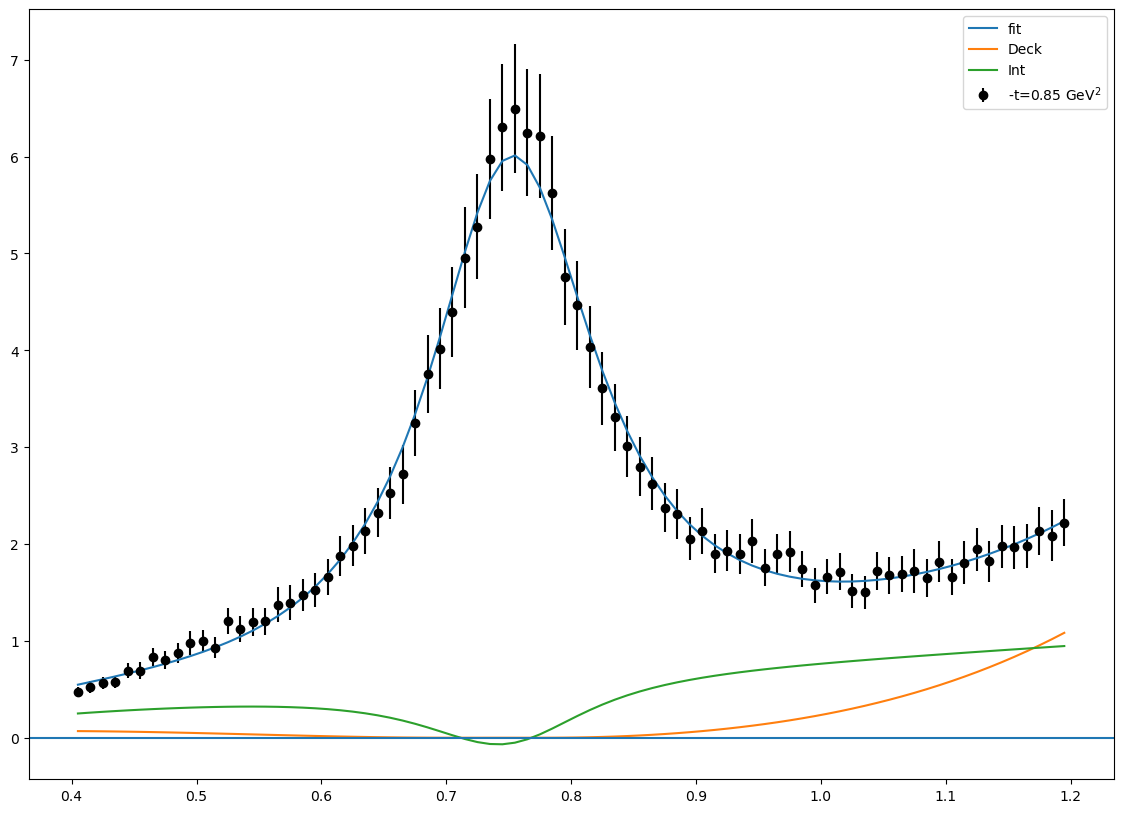

In [8]:
plt.rcParams["figure.figsize"] = (14,10)
plt.errorbar(Y85["mpipi"], Y85["Y00"], Y85["dY00"], fmt="ok", label=r"-t=0.85 GeV$^2$")
plt.plot(Y85["mpipi"], intensity(Y85["mpipi"], *m1.values), label="fit")
plt.plot(Y85["mpipi"], Deck(Y85["mpipi"], *m1.values), label="Deck")
plt.plot(Y85["mpipi"], interference(Y85["mpipi"], *m1.values), label="Int")
plt.axhline()
plt.legend();

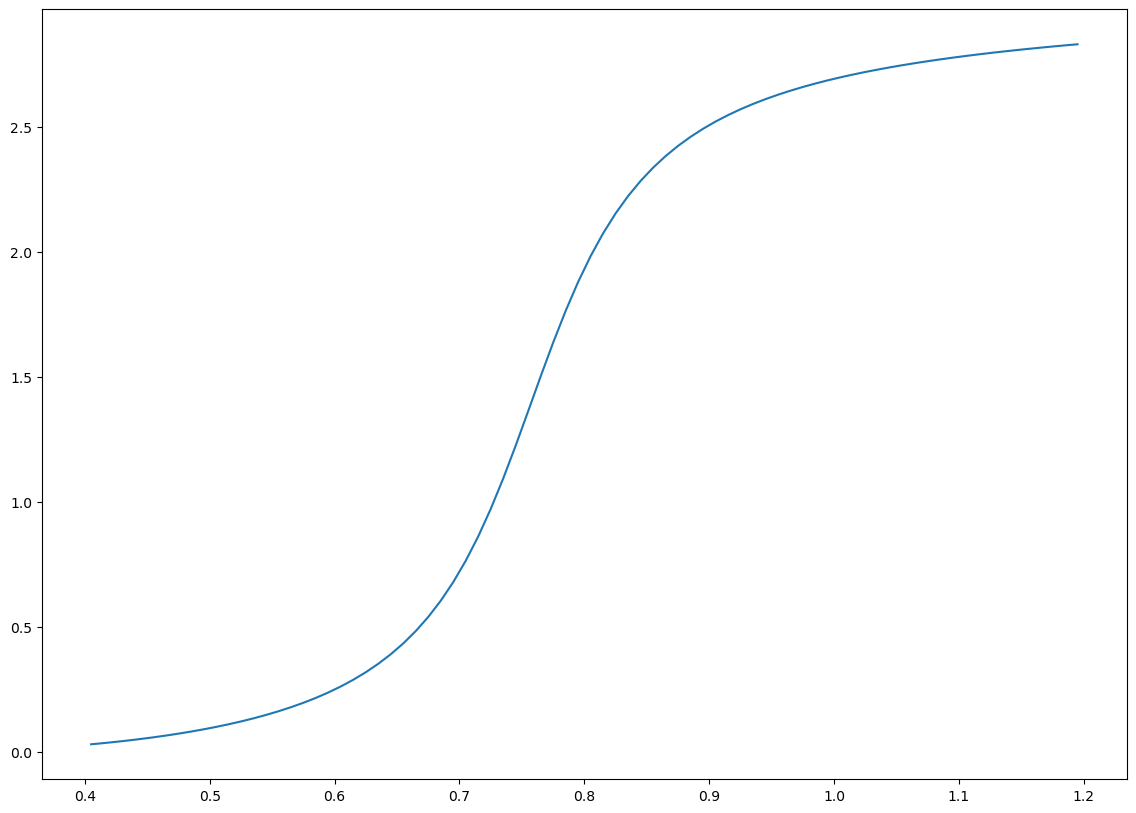

In [9]:
plt.plot(Y45["mpipi"],BWPHASE(Y45["mpipi"],.77,.15))